# HW5 Skeleton Code
Please note that this skeleton code is provided to help you with homework.
Full description of each question can be found on HW5.pdf, so please read instruction of each question carefully. There might be some questions that is not presented in this code.

In [1]:
import os
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

## Q. Changing HTML Text to Plain Text

The Python library <b>BeautifulSoup</b> is useful for dealing with html text. In order to use this library, you will need to install it first by running the following command:
 <b>conda install beautifulsoup4</b>
 in the terminal.
 <br> In the code, you can import it by running the following line:
<br>
  <b>from bs4 import BeautifulSoup </b>
<br>

In [2]:
#Read our data file

df_train = pd.read_csv("stack_stats_2023_train.csv") 
df_test = pd.read_csv("stack_stats_2023_test.csv") 
df_train

,Id,Score,Body,Title,Tags
0,500620,0,<p>I have the following head of data</p>\n<pre...,Linear mixed effect model; degrees of freedom ...,<r><lme4-nlme>
1,483677,0,<p>I want to predict a multivariate time serie...,Does LSTM without delayed inputs work as a dee...,<machine-learning><time-series><neural-network...
2,464381,1,<p>Bolker (2015) talks of a research scenario ...,Mixed models: Why are deviations of each level...,<mixed-model><terminology>
3,494560,0,"<p>there is a reference to the <span class=""ma...",Understanding leverage and influence,<machine-learning><inference><intuition><lever...
4,466706,3,"<p>We want to estimate <span class=""math-conta...",Goodness of Fit ot Least Squares with known me...,<regression><chi-squared-test><least-squares><...
...,...,...,...,...,...
19242,481093,0,<p>I'm composing a survey where I compare two ...,Compare two products directly or separately in...,<hypothesis-testing><t-test><survey>
19243,484636,1,<p>I'm not so much interested in implementatio...,How do the decision boundaries of logistic reg...,<machine-learning><logistic><classification><svm>
19244,487976,2,<p>I was wondering from a technical perspectiv...,Offset vs weigths in GLM,<generalized-linear-model><weights><offset>
19245,483803,0,"<p>In orden to avoid overfitting, how I can ch...",How to tune the number of epochs of a neural n...,<neural-networks><cross-validation>


In [4]:
#Cleaning 'Body'
#Change HTML Text to Plain text using get_text() function from BeautifulSoup
#If you are not familiar with the apply method, please check discussion week 10 lecture and code.
df_train['Body'] = df_train['Body'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text()) #Todo
#Manually cleaned up newline tag \n and tab tag \t.
df_train['Body'] = df_train['Body'].apply(lambda x: x.replace("\n", "")) #Todo
df_train['Body'] = df_train['Body'].apply(lambda x: x.replace("\t", "")) #Todo

#Todo: Clean Tags, please feel free to add any lines below
df_train['Tags'] = df_train['Tags'].apply(lambda x: x.replace(">", " ")) #Todo
df_train['Tags'] = df_train['Tags'].apply(lambda x: x.replace("<", " ")) #Todo


#Todo: Repeat the same process for test dataset
#Cleaning 'Body'
#Change HTML Text to Plain text using get_text() function from BeautifulSoup
#If you are not familiar with the apply method, please check discussion week 10 lecture and code.
df_test['Body'] = df_test['Body'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text()) #Todo
#Manually cleaned up newline tag \n and tab tag \t.
df_test['Body'] = df_test['Body'].apply(lambda x: x.replace("\n", "")) #Todo
df_test['Body'] = df_test['Body'].apply(lambda x: x.replace("\t", "")) #Todo

#Todo: Clean Tags, please feel free to add any lines below
df_test['Tags'] = df_test['Tags'].apply(lambda x: x.replace(">", " ")) #Todo
df_test['Tags'] = df_test['Tags'].apply(lambda x: x.replace("<", " ")) #Todo

## Q. Basic Text Cleaning and Merging into a single Text data

### Change to Lower Case, Remove puncuation, digits,

In [5]:
#Change to Lowercase

df_train[['Body','Title','Tags']] = df_train[['Body','Title','Tags']].applymap(lambda x: x.lower()) #Todo, do you see why we used applymap instead of apply in this case?
df_test[['Body','Title','Tags']] = df_test[['Body','Title','Tags']].applymap(lambda x: x.lower()) #Todo

In [6]:
#Remove Punctations
from string import punctuation

#You can get this function from our discussion session code. However, we leave it as a blank for a practice.
def remove_punctuation(document):
    no_punct = "".join([c for c in document if c not in punctuation])#Todo
    return no_punct

df_train[['Body','Title','Tags']] = df_train[['Body','Title','Tags']].applymap(lambda x: remove_punctuation(x))#Todo
df_test[['Body','Title','Tags']] = df_test[['Body','Title','Tags']].applymap(lambda x: remove_punctuation(x))#Todo

In [7]:
#Remove Digits

def remove_digit(document):

    no_digit = "".join([c for c in document if not c.isdigit()])#Todo

    return no_digit

df_train[['Body','Title','Tags']] = df_train[['Body','Title','Tags']].applymap(lambda x: remove_digit(x))#Todo
df_test[['Body','Title','Tags']] = df_train[['Body','Title','Tags']].applymap(lambda x: remove_digit(x))#Todo

### Tokenization and Remove Stopwords and do stemming

In [8]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
df_train[['Body','Title','Tags']] = df_train[['Body','Title','Tags']].applymap(lambda x: word_tokenize(x))#Todo
df_test[['Body','Title','Tags']] = df_test[['Body','Title','Tags']].applymap(lambda x: word_tokenize(x))#Todo

[nltk_data] Downloading package punkt to /Users/noahsano/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
#Remove Stopwords

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(document):
    
    words = [word for word in document if not word in stop_words]

    return words

df_train[['Body','Title','Tags']] = df_train[['Body','Title','Tags']].applymap(lambda x: remove_stopwords(x))
df_test[['Body','Title','Tags']] = df_test[['Body','Title','Tags']].applymap(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/noahsano/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
#We use porter stemming

from nltk.stem import PorterStemmer

porter = PorterStemmer()

def stemmer(document):

    stemmed_document = [porter.stem(w) for w in document]#Todo

    return stemmed_document

df_train[['Body','Title','Tags']] = df_train[['Body','Title','Tags']].applymap(lambda x: stemmer(x))#Todo
df_test[['Body','Title','Tags']] = df_test[['Body','Title','Tags']].applymap(lambda x: stemmer(x))#Todo


## Let's Check our dataframe

In [11]:
df_train.head(5)

,Id,Score,Body,Title,Tags
0,500620,0,"[follow, head, data, p, p, id, type, host, ca,...","[linear, mix, effect, model, degre, freedom, p...","[r, lmenlm]"
1,483677,0,"[want, predict, multivari, time, seri, time, s...","[lstm, without, delay, input, work, deep, net]","[machinelearn, timeseri, neuralnetwork, lstm, ..."
2,464381,1,"[bolker, talk, research, scenario, site, group...","[mix, model, deviat, level, group, factor, val...","[mixedmodel, terminolog]"
3,494560,0,"[refer, ith, diagon, entri, h, hxxtxxt, defini...","[understand, leverag, influenc]","[machinelearn, infer, intuit, leverag]"
4,466706,3,"[want, estim, beta, fori, xbeta, epsilonwher, ...","[good, fit, ot, least, squar, known, measur, u...","[regress, chisquaredtest, leastsquar, goodness..."


### Q. Treat Three text data independently and merge into one column

In [12]:
#Treat Three types of data independently
#let's define functions that will help this operation

def add_body(document):

    added_document = [w + "_body" for w in document] #Todo

    return added_document

def add_title(document):

    added_document = [w + "_title" for w in document]#Todo

    return added_document

def add_tags(document):

    added_document = [w + "_tags" for w in document]#Todo

    return added_document

In [13]:
df_train['Body'] = df_train['Body'].apply(add_body)
df_train['Title'] = df_train['Title'].apply(add_title)
df_train['Tags'] = df_train['Tags'].apply(add_tags)

df_test['Body'] = df_test['Body'].apply(add_body)
df_test['Title'] = df_test['Title'].apply(add_title)
df_test['Tags'] = df_test['Tags'].apply(add_tags)

In [14]:
#Now we need to merge all those 3 columns into a single column. Implement this below.
df_train['text'] = df_train['Body'] + df_train['Title'] + df_train['Tags']#Todo
df_test['text'] = df_test['Body'] + df_train['Title'] + df_train['Tags']#Todo

In [15]:
#Remove duplicate words in each category

def dup_remove(document):
    dup = []
    [dup.append(w) for w in document if w not in dup]    
    return dup

df_train['text'] = df_train['text'].apply(lambda x: dup_remove(x))#Todo
df_test['text'] = df_test['text'].apply(lambda x: dup_remove(x))#Todo

## Let's check our DataFrame

In [16]:
df_train

,Id,Score,Body,Title,Tags,text
0,500620,0,"[follow_body, head_body, data_body, p_body, p_...","[linear_title, mix_title, effect_title, model_...","[r_tags, lmenlm_tags]","[follow_body, head_body, data_body, p_body, id..."
1,483677,0,"[want_body, predict_body, multivari_body, time...","[lstm_title, without_title, delay_title, input...","[machinelearn_tags, timeseri_tags, neuralnetwo...","[want_body, predict_body, multivari_body, time..."
2,464381,1,"[bolker_body, talk_body, research_body, scenar...","[mix_title, model_title, deviat_title, level_t...","[mixedmodel_tags, terminolog_tags]","[bolker_body, talk_body, research_body, scenar..."
3,494560,0,"[refer_body, ith_body, diagon_body, entri_body...","[understand_title, leverag_title, influenc_title]","[machinelearn_tags, infer_tags, intuit_tags, l...","[refer_body, ith_body, diagon_body, entri_body..."
4,466706,3,"[want_body, estim_body, beta_body, fori_body, ...","[good_title, fit_title, ot_title, least_title,...","[regress_tags, chisquaredtest_tags, leastsquar...","[want_body, estim_body, beta_body, fori_body, ..."
...,...,...,...,...,...,...
19242,481093,0,"[im_body, compos_body, survey_body, compar_bod...","[compar_title, two_title, product_title, direc...","[hypothesistest_tags, ttest_tags, survey_tags]","[im_body, compos_body, survey_body, compar_bod..."
19243,484636,1,"[im_body, much_body, interest_body, implement_...","[decis_title, boundari_title, logist_title, re...","[machinelearn_tags, logist_tags, classif_tags,...","[im_body, much_body, interest_body, implement_..."
19244,487976,2,"[wonder_body, technic_body, perspect_body, app...","[offset_title, vs_title, weigth_title, glm_title]","[generalizedlinearmodel_tags, weight_tags, off...","[wonder_body, technic_body, perspect_body, app..."
19245,483803,0,"[orden_body, avoid_body, overfit_body, choos_b...","[tune_title, number_title, epoch_title, neural...","[neuralnetwork_tags, crossvalid_tags]","[orden_body, avoid_body, overfit_body, choos_b..."


### Q. Detokenize and convert to document term matrices

In [17]:
#Merge Three text column into one column and detokenize

from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import CountVectorizer

text_train = df_train['text'].apply(TreebankWordDetokenizer().detokenize) 
countvec = CountVectorizer(min_df = 0.01) 
sparse_dtm_train = countvec.fit_transform(text_train)

In [18]:
#Todo: Do same on the test set.
text_test = df_test['text'].apply(TreebankWordDetokenizer().detokenize)
countvec_test = CountVectorizer(min_df = 0.01) 
sparse_dtm_test = countvec_test.fit_transform(text_test)

In [19]:
#Convert the sprase dtm to pandas DataFrame.
dtm_train = pd.DataFrame(sparse_dtm_train.toarray(), columns=countvec.get_feature_names_out(), index=df_train.index)
dtm_test = pd.DataFrame(sparse_dtm_test.toarray(), columns=countvec_test.get_feature_names_out(), index=df_test.index)

### Q. Change dependent variable to binary variable

In [20]:
#Change 'Score' to a binary variable, which indicates whether the question is good or not.
y_train = (df_train["Score"] >= 1).astype(int)#Todo
y_test = (df_test["Score"] >= 1).astype(int)#Todo

In [21]:
#Add y_train and y_test to your data frame if it is needed. Drop unnecessary columns
df_train['useful'] = y_train
df_test['useful'] = y_test
df_train.drop(columns = ["Score", "Body", "Title", "Tags"], inplace = True)
df_test.drop(columns = ["Score", "Body", "Title", "Tags"], inplace = True)

## Let's check our DataFrame


In [22]:
df_train.head(5)

,Id,text,useful
0,500620,"[follow_body, head_body, data_body, p_body, id...",0
1,483677,"[want_body, predict_body, multivari_body, time...",0
2,464381,"[bolker_body, talk_body, research_body, scenar...",1
3,494560,"[refer_body, ith_body, diagon_body, entri_body...",0
4,466706,"[want_body, estim_body, beta_body, fori_body, ...",1


## (b) Please read the instruction carefully in the pdf.

In [23]:
X_train = dtm_train[dtm_train.columns.intersection(dtm_test.columns.values)]
X_test = dtm_test[dtm_test.columns.intersection(dtm_train.columns.values)]
print(y_train.value_counts())
print(y_test.value_counts())

0    9670
1    9577
Name: Score, dtype: int64
0    4240
1    4009
Name: Score, dtype: int64


In [27]:
#Baseline Model: Predict the most common usefulness: 1 if score >= 1 and 0 if score < 1
from sklearn.metrics import confusion_matrix

baseline_PRE = [0 for y in y_test]
BL_cm = confusion_matrix(y_test, baseline_PRE)

baseline_acc = (BL_cm.ravel()[0]+BL_cm.ravel()[3])/sum(BL_cm.ravel())
baseline_TPR = BL_cm.ravel()[3]/(BL_cm.ravel()[3]+BL_cm.ravel()[2])
baseline_FPR = BL_cm.ravel()[1]/(BL_cm.ravel()[1]+BL_cm.ravel()[0])
print('Accuracy is: %.4f' % baseline_acc)
print('TPR is: %.4f' % baseline_TPR)
print('FPR is: %.4f' % baseline_FPR)

Accuracy is: 0.5140
TPR is: 0.0000
FPR is: 0.0000


In [29]:
baseline_PRE = BL_cm.ravel()[1]//(BL_cm.ravel()[1]+BL_cm.ravel()[3])

/var/folders/hz/fvwx4crd2zz5m0nd9l3ntyhw0000gn/T/ipykernel_7167/1682226680.py:1: RuntimeWarning: divide by zero encountered in scalar floor_divide
  baseline_PRE = BL_cm.ravel()[1]//(BL_cm.ravel()[1]+BL_cm.ravel()[3])


In [30]:
from sklearn.linear_model import LogisticRegression

#Logisitic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_prob = logreg.predict_proba(X_test)
log_PRE = pd.Series([1 if x > 0.5 else 0 for x in logreg_prob[:,1]], index=y_test.index)
log_cm = confusion_matrix(y_test, log_PRE)
log_acc = (log_cm.ravel()[0]+log_cm.ravel()[3])/sum(log_cm.ravel())
log_TPR = log_cm.ravel()[3]/(log_cm.ravel()[3]+log_cm.ravel()[2])
log_FPR = log_cm.ravel()[1]/(log_cm.ravel()[1]+log_cm.ravel()[0])
print('Accuracy is: %.4f' % log_acc)
print('TPR is: %.4f' % log_TPR)
print('FPR is: %.4f' % log_FPR)

Accuracy is: 0.5036
TPR is: 0.4625
FPR is: 0.4575


In [31]:
log_PRE = log_cm.ravel()[1]/(log_cm.ravel()[1]+log_cm.ravel()[3])

In [32]:
#Decision Tree Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

grid_values = {'ccp_alpha': np.linspace(0, 0.1, 30)}

dtc = DecisionTreeClassifier(random_state=2023)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=5).fit(X_train, y_train)

dtc_PRE = dtc_cv.predict(X_test)
dtc_cm = confusion_matrix(y_test, dtc_PRE)

dtc_acc = accuracy_score(y_test, dtc_PRE)
dtc_TPR = dtc_cm.ravel()[3]/(dtc_cm.ravel()[3]+dtc_cm.ravel()[2])
dtc_FPR =  dtc_cm.ravel()[1]/(dtc_cm.ravel()[1]+dtc_cm.ravel()[0])

print('Accuracy is: %.4f' % dtc_acc)
print('TPR is: %.4f' % dtc_TPR)
print('FPR is: %.4f' % dtc_FPR)

Accuracy is: 0.5015
TPR is: 0.5056
FPR is: 0.5024


In [35]:
dtc_PRE = dtc_cm.ravel()[1]/(dtc_cm.ravel()[1]+dtc_cm.ravel()[3])

In [36]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest without CV

rf = RandomForestClassifier(random_state 
                            = 2023)
rf.fit(X_train, y_train)

rf_PRE = rf.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_PRE)

rf_acc = (rf_cm.ravel()[0]+ rf_cm.ravel()[3])/sum(rf_cm.ravel())
rf_TPR = rf_cm.ravel()[3]/(rf_cm.ravel()[3]+rf_cm.ravel()[2])
rf_FPR =  rf_cm.ravel()[1]/(rf_cm.ravel()[1]+rf_cm.ravel()[0])

print('Accuracy is: %.4f' % rf_acc)
print('TPR is: %.4f' % rf_TPR)
print('FPR is: %.4f' % rf_FPR)

Accuracy is: 0.5015
TPR is: 0.5056
FPR is: 0.5024


In [37]:
rf_PRE = rf_cm.ravel()[1]/(rf_cm.ravel()[1]+rf_cm.ravel()[3])

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#LDA

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

lda_PRE = lda.predict(X_test)
lda_cm = confusion_matrix(y_test, lda_PRE)

lda_acc = (lda_cm.ravel()[0]+ lda_cm.ravel()[3])/sum(lda_cm.ravel())
lda_TPR = lda_cm.ravel()[3]/(lda_cm.ravel()[3]+lda_cm.ravel()[2])
lda_FPR =  lda_cm.ravel()[1]/(lda_cm.ravel()[1]+lda_cm.ravel()[0])

print('Accuracy is: %.4f' % lda_acc)
print('TPR is: %.4f' % lda_TPR)
print('FPR is: %.4f' % lda_FPR)

Accuracy is: 0.5052
TPR is: 0.4595
FPR is: 0.4517


In [39]:
lda_PRE = lda_cm.ravel()[1]/(lda_cm.ravel()[1]+lda_cm.ravel()[3])

In [40]:
#Create Comparison Table
#These lines are provided for you to help construct a comparison table.
#It is not requred to follow this format. + You need to find ACC, TPR, FPR, PRE for each model that you choose.
comparison_data = {'Baseline':[baseline_acc,baseline_TPR,baseline_FPR, baseline_PRE],
                   'Logistic Regression':[log_acc,log_TPR,log_FPR, log_PRE],
                   'Decision Tree Classifier':[dtc_acc,dtc_TPR,dtc_FPR,dtc_PRE],
                   'Random Forest without CV':[rf_acc,rf_TPR, rf_FPR,rf_PRE],
                  'Linear Discriminant Analysis':[lda_acc,lda_TPR, lda_FPR,lda_PRE]}

comparison_table = pd.DataFrame(data=comparison_data, index=['Accuracy', 'TPR', 'FPR','PRE']).transpose()
comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])
comparison_table

,Accuracy,TPR,FPR,PRE
Baseline,0.514002,0.000000,0.000000,0.000000
Logistic Regression,0.503576,0.462459,0.457547,0.511334
Decision Tree Classifier,0.501515,0.505612,0.502358,0.512389
Random Forest without CV,0.501515,0.505612,0.502358,0.512389
Linear Discriminant Analysis,0.505152,0.459466,0.451651,0.509715



## Report details of your training procedures and final comparisons on the test set in this cell. Use your best judgment to choose a final model and explain your choice.

## Report Bootstrap Analysis in this cell

### (c)

In [51]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test.array, log_PRE)
print('ROC_AUC Logistic Regression: %.4f' % auc(fpr, tpr))

ROC_AUC Logistic Regression: 0.5015


In [45]:
fpr, tpr, _ = roc_curve(y_test.array, dtc_PRE)
print('ROC_AUC CART: %.4f' % auc(fpr, tpr))

NameError: name 'dtc_PRE' is not defined

In [92]:
fpr, tpr, _ = roc_curve(y_test.array, rf_PRE)
print('ROC_AUC RF: %.4f' % auc(fpr, tpr))

ROC_AUC RF: 0.5016


array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
fpr, tpr, _ = roc_curve(y_test.array, lda_PRE)
print('ROC_AUC LDA: %.4f' % auc(fpr, tpr))

In [83]:
def roc_auc(pre, y_test):
    fpr, tpr, _ = roc_curve(y_test.array, pre)
    return auc(fpr, tpr)

In [84]:
import time

def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=2000, random_state=2023):
    tic = time.time()
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label)

    output_df = pd.DataFrame(output_array)
    return output_df

In [85]:
bs_output = bootstrap_validation(X_test,y_test,y_train,rf,
                                 metrics_list=[roc_auc],)

(2000, 1)


In [86]:
bs_output

,0
0,0.514610
1,0.506431
2,0.504924
3,0.508599
4,0.492175
...,...
1995,0.506452
1996,0.486843
1997,0.496124
1998,0.495218


(-0.05, 0.05)

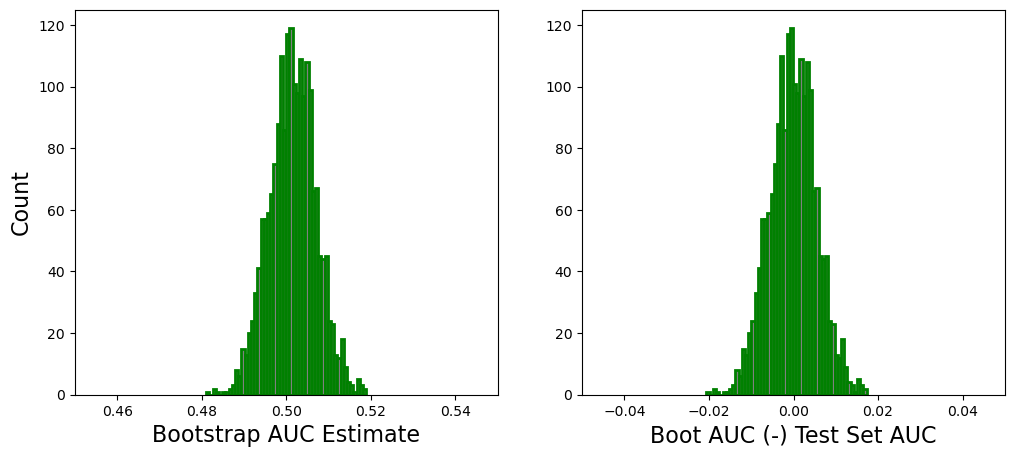

In [87]:
test_auc = roc_auc(rf_PRE,y_test)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap AUC Estimate', fontsize=16)
axs[1].set_xlabel('Boot AUC (-) Test Set AUC', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output.iloc[:,0], bins=50,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.45,0.55])
axs[1].hist(bs_output.iloc[:,0] - test_auc, bins=50,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.05,0.05])

In [88]:
# The 95% confidence interval
CI= np.quantile(bs_output.iloc[:,0]-test_auc,np.array([0.025,0.975]))
print("The 95-percent confidence interval of AUC is %s" % CI)

The 95-percent confidence interval of AUC is [-0.01082622  0.01082313]


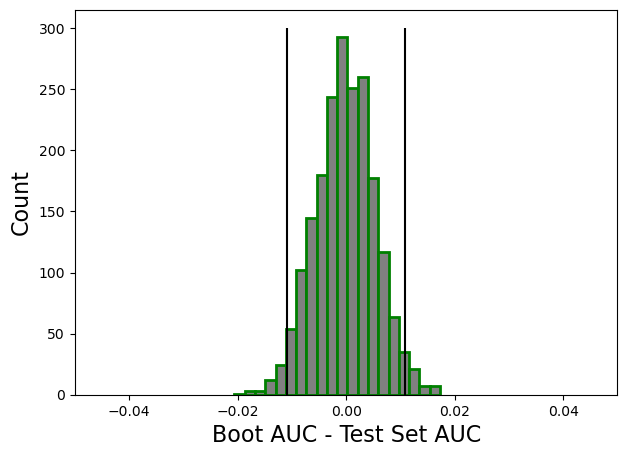

In [91]:
fig, axs = plt.subplots(ncols=1, figsize=(7,5))
axs.set_xlabel('Boot AUC - Test Set AUC', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output.iloc[:,0]-test_auc, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs.set_xlim([-0.05,0.05])
axs.vlines(x=CI[0], ymin = 0, ymax =300, color = "black")
axs.vlines(x=CI[1], ymin = 0, ymax =300, color = "black")

In [301]:
def fifteen_top_result_log(test_data, test_label, train_label, sample=5000, random_state=2023):
    n_sample = sample

    predictions=np.zeros([n_sample])
    predictions[:]=np.nan
    
    for bs_iter in range(n_sample):
        #Select one random observation and its true results
        bs_index = np.random.choice(test_data.index, 15, replace=False)
        bs_label = test_label.loc[bs_index]
        bs_data = test_data.loc[bs_index]
        
        
        probas = pd.Series([x for x in logreg.predict_proba(bs_data)[:,1]])
        best_prob = -9999
        best_prob_true_val = None
        for i in range(len(probas)):
            if probas[i] > best_prob:
                best_prob = probas[i]
                best_prob_true_val = bs_label[bs_index[i]]
        predictions[bs_iter] = best_prob_true_val == 1
    
    return sum(predictions) / sample

fifteen_log_bs = fifteen_top_result_log(X_test,y_test,y_train)
fifteen_log_bs

0.503

In [300]:
def fifteen_top_result(test_data, test_label, train_label, sample=5000, random_state=2023):
    n_sample = sample
    predictions=np.zeros([n_sample])
    predictions[:]=np.nan
    
    for bs_iter in range(n_sample):
        #Select one random observation and its true results
        bs_index = np.random.choice(test_data.index, 15, replace=False)
        bs_label = test_label.loc[bs_index]
        
        predictions[bs_iter] = bs_label[bs_index[0]] == 1
    
    return sum(predictions) / sample

fifteen_bs = fifteen_top_result(X_test,y_test,y_train)
fifteen_bs

0.478